# Homework 7, Part Two: A dataset about dogs.

Data from [a FOIL request to New York City](https://www.muckrock.com/foi/new-york-city-17/pet-licensing-data-for-new-york-city-23826/).

Some of the questions get kind of weird in this one, especially later on. **Feel free to lean on ChatGPT for the crazier ones!** It might be an interesting exploration of how to ask problems or explain what your dataset looks like.

## Do your importing and your setup

In [102]:
import pandas as pd
import altair as alt

## Read in the file `NYC_Dog_Licenses_Current_as_of_4-28-2016.xlsx` and look at the first five rows

In [3]:
dogs = pd.read_excel("NYC_Dog_Licenses_Current_as_of_4-28-2016.xlsx",
                     nrows=30000)
dogs.head(5)

,Owner Zip Code,Animal Name,Animal Gender,Primary Breed,Secondary Breed,Animal Dominant Color,Animal Secondary Color,Animal Third Color,Animal Birth,Spayed or Neut,Guard or Trained,Vaccinated,Application Date,License Issued Date,License Expired Date
0,10024,BLUE MACK,M,Unknown,AIREDALE TERR,BROWN,BLACK,NaN,2007-11-01,Yes,No,Yes,2012-09-19 16:01:19.647,2015-09-19,2016-09-19
1,10461,Indie Zephir,M,Rottweiler,NaN,BLACK,TAN,NaN,2013-04-01,No,No,Yes,2013-09-20 11:41:36.647,2014-09-20,2018-09-20
2,10013,Bilal,M,Australian Cattledog,NaN,Rust,NaN,NaN,2014-09-01,Yes,NaN,No,2014-09-12 13:13:36.713,2014-09-12,2019-09-12
3,10025,Buddy,M,Unknown,Cockapoo,BLOND,WHITE,NaN,2008-04-01,Yes,No,Yes,2014-09-12 15:26:51.417,2014-09-12,2017-10-20
4,10013,Ali,M,Basenji,NaN,Black,NaN,NaN,2014-01-01,No,NaN,No,2014-09-12 15:43:17.707,2014-09-12,2019-09-12


## How many rows do you have in the data? What are the column types?

If there are more than 30,000 rows in your dataset, go back and only read in the first 30,000.

In [4]:
dogs.shape

(30000, 15)

In [5]:
dogs.dtypes

Owner Zip Code                     int64
Animal Name                       object
Animal Gender                     object
Primary Breed                     object
Secondary Breed                   object
Animal Dominant Color             object
Animal Secondary Color            object
Animal Third Color                object
Animal Birth              datetime64[ns]
Spayed or Neut                    object
Guard or Trained                  object
Vaccinated                        object
Application Date          datetime64[ns]
License Issued Date       datetime64[ns]
License Expired Date      datetime64[ns]
dtype: object

## Describe the dataset in words. What is each row? List two column titles along with what each of those columns means.

For example: “Each row is an animal in the zoo. `is_reptile` is whether the animal is a reptile or not”

Each row is an individual dog licensed in NYC. 'Animal Birth' is the birthday in Month-year[last two digits] format, and 'Vaccinated' is whether the animal is vaccinated (for what?)

# Your thoughts

Think of three questions you could ask this dataset. **Don't ask them**, just write them down in the cell below. Feel free to use either Markdown or Python comments.

1. What is 'Guard or Trained'? Does it mean whether they are a guard dog AND/OR trained for a certain job?
2. Are all blank cells under 'Guard or Trained' = 'Yes'? The values are either 'No' or blank.
3. 'Vaccinated' column = for what vaccines?

# Looking at some dogs

## What are the most popular (primary) breeds of dogs? Graph the top 10.

In [6]:
dogs['Primary Breed'].value_counts().head(10)

Primary Breed
Unknown                                 4777
Yorkshire Terrier                       1882
Shih Tzu                                1760
Chihuahua                               1535
Maltese                                 1133
Labrador Retriever                      1074
American Pit Bull Terrier/Pit Bull       780
Labrador Retriever Crossbreed            738
American Pit Bull Mix / Pit Bull Mix     722
Jack Russell Terrier                     553
Name: count, dtype: int64

<Axes: ylabel='Primary Breed'>

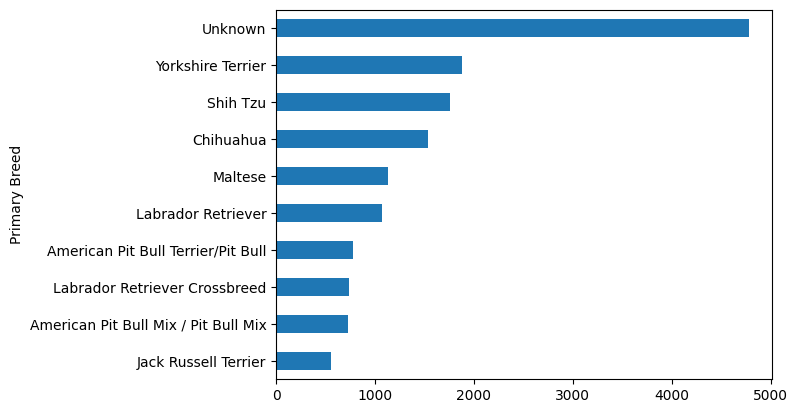

In [7]:
dogs['Primary Breed'].value_counts().head(10).sort_values(ascending=True).plot(kind='barh')

## "Unknown" is a terrible breed! Graph the top 10 breeds that are NOT Unknown

...maybe "unknown" should just count as missing data?

In [8]:
dogs = pd.read_excel("NYC_Dog_Licenses_Current_as_of_4-28-2016.xlsx",
                     nrows=30000,
                     na_values=['Unknown', 'UNKNOWN'])

<Axes: ylabel='Primary Breed'>

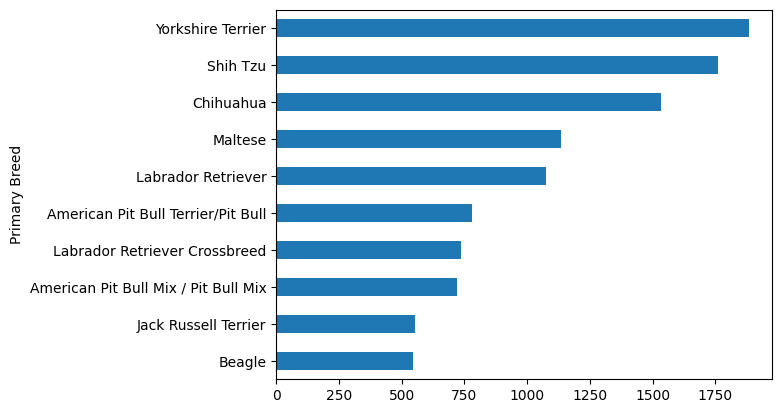

In [9]:
dogs['Primary Breed'].value_counts().head(10).sort_values(ascending=True).plot(kind='barh')

## What are the most popular dog names?

In [10]:
dogs['Animal Name'].value_counts().head()

Animal Name
Max        202
Bella      193
Charlie    172
Lola       146
Rocky      140
Name: count, dtype: int64

## Do any dogs have your name? How many dogs are named "Max," and how many are named "Maxwell"?

In [11]:
dogs.query("`Animal Name` == 'Ariane'")

# use backticks ` ` for .query if column name has a space in it

,Owner Zip Code,Animal Name,Animal Gender,Primary Breed,Secondary Breed,Animal Dominant Color,Animal Secondary Color,Animal Third Color,Animal Birth,Spayed or Neut,Guard or Trained,Vaccinated,Application Date,License Issued Date,License Expired Date


In [12]:
dogs[dogs['Animal Name'] == 'Ariane']

# or use this syntax

,Owner Zip Code,Animal Name,Animal Gender,Primary Breed,Secondary Breed,Animal Dominant Color,Animal Secondary Color,Animal Third Color,Animal Birth,Spayed or Neut,Guard or Trained,Vaccinated,Application Date,License Issued Date,License Expired Date


No dogs have my name! That's probably good, my name is not a good dog name

## What percentage of dogs are guard dogs?

Assuming that blank cells in this column = 'Yes'...

In [13]:
dogs['Guard or Trained'].isnull().sum() / dogs.shape[0] * 100

# dogs.shape[0] provides the total number of rows

np.float64(33.913333333333334)

## What are the actual numbers?

Here I'm assuming, like above, that blank rows = 'Yes', which we find out below is a wrong assumption

In [14]:
dogs['Guard or Trained'].isnull().sum()

#how many guard/trained dogs

np.int64(10174)

In [15]:
dogs['Guard or Trained'].notnull().sum()

#how many not guard/trained dogs

np.int64(19826)

In [16]:
dogs['Guard or Trained'].isnull().sum() + dogs['Guard or Trained'].notnull().sum()

np.int64(30000)

It is the same as number of rows... oh ok, let's calculate another way

In [17]:
dogs['Guard or Trained'].value_counts()

Guard or Trained
No     19809
Yes       17
Name: count, dtype: int64

Alright there are some rows that are No, some that are Yes, and a bunch of blanks (probably because the owner had no idea what the question meant)!

## Wait... if you add that up, is it the same as your number of rows? Where are the other dogs???? How can we find them??????

Use your `.head()` to think about it, then you'll be a little more specific when using `.value_counts()`

In [ ]:
dogs['Guard or Trained'].value_counts(dropna=False)

Guard or Trained
No     19809
NaN    10174
Yes       17
Name: count, dtype: int64

## Fill in all of those empty "Guard or Trained" columns with "No"

In this case, it seems nicer than missing data. Then check your result with another `.value_counts()`

In [22]:
dogs['Guard or Trained'].fillna('No', inplace=True)

In [23]:
dogs['Guard or Trained'].value_counts()

Guard or Trained
No     29983
Yes       17
Name: count, dtype: int64

## What are the top dog breeds for guard dogs? 

In [25]:
dogs.query('`Guard or Trained` == "Yes"')['Primary Breed'].value_counts()

Primary Breed
German Shepherd Dog           3
Poodle, Standard              1
German Shepherd Crossbreed    1
Labrador Retriever            1
Doberman Pinscher             1
Shih Tzu                      1
Rottweiler                    1
Golden Retriever              1
Schnauzer, Miniature          1
Yorkshire Terrier             1
Name: count, dtype: int64

## Create a new column called "year" that is the dog's year of birth

If `Animal Birth` is a datetime it makes things much easier.

In [31]:
dogs.dtypes

Owner Zip Code                     int64
Animal Name                       object
Animal Gender                     object
Primary Breed                     object
Secondary Breed                   object
Animal Dominant Color             object
Animal Secondary Color            object
Animal Third Color                object
Animal Birth              datetime64[ns]
Spayed or Neut                    object
Guard or Trained                  object
Vaccinated                        object
Application Date          datetime64[ns]
License Issued Date       datetime64[ns]
License Expired Date      datetime64[ns]
Year                               int32
dtype: object

In [32]:
# Animal Birth is already a datetime but if not could do:
dogs['Animal Birth'] = pd.to_datetime(dogs['Animal Birth'])

dogs['Year'] = dogs['Animal Birth'].dt.year

In [33]:
dogs.head()

,Owner Zip Code,Animal Name,Animal Gender,Primary Breed,Secondary Breed,Animal Dominant Color,Animal Secondary Color,Animal Third Color,Animal Birth,Spayed or Neut,Guard or Trained,Vaccinated,Application Date,License Issued Date,License Expired Date,Year
0,10024,BLUE MACK,M,NaN,AIREDALE TERR,BROWN,BLACK,NaN,2007-11-01,Yes,No,Yes,2012-09-19 16:01:19.647,2015-09-19,2016-09-19,2007
1,10461,Indie Zephir,M,Rottweiler,NaN,BLACK,TAN,NaN,2013-04-01,No,No,Yes,2013-09-20 11:41:36.647,2014-09-20,2018-09-20,2013
2,10013,Bilal,M,Australian Cattledog,NaN,Rust,NaN,NaN,2014-09-01,Yes,No,No,2014-09-12 13:13:36.713,2014-09-12,2019-09-12,2014
3,10025,Buddy,M,NaN,Cockapoo,BLOND,WHITE,NaN,2008-04-01,Yes,No,Yes,2014-09-12 15:26:51.417,2014-09-12,2017-10-20,2008
4,10013,Ali,M,Basenji,NaN,Black,NaN,NaN,2014-01-01,No,No,No,2014-09-12 15:43:17.707,2014-09-12,2019-09-12,2014


## Calculate a new column called “age” that shows approximately how old the dog is. How old are dogs on average?

In [34]:
from datetime import date

In [36]:
dogs['Age'] = date.today().year - dogs['Year']
dogs.head()

,Owner Zip Code,Animal Name,Animal Gender,Primary Breed,Secondary Breed,Animal Dominant Color,Animal Secondary Color,Animal Third Color,Animal Birth,Spayed or Neut,Guard or Trained,Vaccinated,Application Date,License Issued Date,License Expired Date,Year,Age
0,10024,BLUE MACK,M,NaN,AIREDALE TERR,BROWN,BLACK,NaN,2007-11-01,Yes,No,Yes,2012-09-19 16:01:19.647,2015-09-19,2016-09-19,2007,18
1,10461,Indie Zephir,M,Rottweiler,NaN,BLACK,TAN,NaN,2013-04-01,No,No,Yes,2013-09-20 11:41:36.647,2014-09-20,2018-09-20,2013,12
2,10013,Bilal,M,Australian Cattledog,NaN,Rust,NaN,NaN,2014-09-01,Yes,No,No,2014-09-12 13:13:36.713,2014-09-12,2019-09-12,2014,11
3,10025,Buddy,M,NaN,Cockapoo,BLOND,WHITE,NaN,2008-04-01,Yes,No,Yes,2014-09-12 15:26:51.417,2014-09-12,2017-10-20,2008,17
4,10013,Ali,M,Basenji,NaN,Black,NaN,NaN,2014-01-01,No,No,No,2014-09-12 15:43:17.707,2014-09-12,2019-09-12,2014,11


# Joining data together

## Which neighborhood does each dog live in?

You also have a (terrible) list of NYC neighborhoods in `zipcodes-neighborhoods.csv`. Join these two datasets together, so we know what neighborhood each dog lives in. **Be sure to not read it in as `df`, or else you'll overwrite your dogs dataframe.**

Here's an example of how you can merge two dataframes:

```python
merged = prisons_df.merge(states_df, left_on='state', right_on='name')
```

In the example above, `prisons_df` has a column called `state` that matches with the `name` column of `states_df`. The columns of `states_df` are then added to `prisons_df` and returned as a new dataframe called `merged`.

> **Rows without a match get discarded because it is an [inner join](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.merge.html).** I think left joins are probably the most common (keep rows from the "left" df even if they don't have a match in the right. For example, by default a prison with the state of `PUERTO RICO` would be dropped if PR wasn't in `states_df`, but if you changed it to `how='left'` it would be preserved, but the additional columns would just be `NaN`.

In [38]:
zips = pd.read_csv('zipcodes-neighborhoods.csv')
zips.head()

,neighborhood,zip,borough
0,Central Bronx,10453,Bronx
1,Central Bronx,10457,Bronx
2,Central Bronx,10460,Bronx
3,Bronx Park and Fordham,10458,Bronx
4,Bronx Park and Fordham,10467,Bronx


In [42]:
dogs_zips = dogs.merge(zips, left_on='Owner Zip Code', right_on='zip', how='left')
dogs_zips.head()

# could also write it:
dogs_zips = pd.merge(dogs, zips, left_on='Owner Zip Code', right_on='zip', how='left')
dogs_zips.head()

,Owner Zip Code,Animal Name,Animal Gender,Primary Breed,Secondary Breed,Animal Dominant Color,Animal Secondary Color,Animal Third Color,Animal Birth,Spayed or Neut,Guard or Trained,Vaccinated,Application Date,License Issued Date,License Expired Date,Year,Age,neighborhood,zip,borough
0,10024,BLUE MACK,M,NaN,AIREDALE TERR,BROWN,BLACK,NaN,2007-11-01,Yes,No,Yes,2012-09-19 16:01:19.647,2015-09-19,2016-09-19,2007,18,Upper West Side,10024.0,Manhattan
1,10461,Indie Zephir,M,Rottweiler,NaN,BLACK,TAN,NaN,2013-04-01,No,No,Yes,2013-09-20 11:41:36.647,2014-09-20,2018-09-20,2013,12,Southeast Bronx,10461.0,Bronx
2,10013,Bilal,M,Australian Cattledog,NaN,Rust,NaN,NaN,2014-09-01,Yes,No,No,2014-09-12 13:13:36.713,2014-09-12,2019-09-12,2014,11,Greenwich Village and Soho,10013.0,Manhattan
3,10025,Buddy,M,NaN,Cockapoo,BLOND,WHITE,NaN,2008-04-01,Yes,No,Yes,2014-09-12 15:26:51.417,2014-09-12,2017-10-20,2008,17,Upper West Side,10025.0,Manhattan
4,10013,Ali,M,Basenji,NaN,Black,NaN,NaN,2014-01-01,No,No,No,2014-09-12 15:43:17.707,2014-09-12,2019-09-12,2014,11,Greenwich Village and Soho,10013.0,Manhattan


In [43]:
dogs_zips.dtypes

Owner Zip Code                     int64
Animal Name                       object
Animal Gender                     object
Primary Breed                     object
Secondary Breed                   object
Animal Dominant Color             object
Animal Secondary Color            object
Animal Third Color                object
Animal Birth              datetime64[ns]
Spayed or Neut                    object
Guard or Trained                  object
Vaccinated                        object
Application Date          datetime64[ns]
License Issued Date       datetime64[ns]
License Expired Date      datetime64[ns]
Year                               int32
Age                                int32
neighborhood                      object
zip                              float64
borough                           object
dtype: object

In [50]:
dogs_zips['zip'].astype('Int64')

# have to use 'Int64' to convert float column with na values to integers

0        10024
1        10461
2        10013
3        10025
4        10013
         ...  
29995    11372
29996    11417
29997    11228
29998    11217
29999    10038
Name: zip, Length: 30000, dtype: Int64

## What is the most popular dog name in all parts of the Bronx? How about Brooklyn? The Upper East Side?

In [54]:
dogs_zips.query('borough == "Bronx"')['Animal Name'].value_counts().head(1)

Animal Name
Bella    22
Name: count, dtype: int64

In [55]:
dogs_zips.query('borough == "Brooklyn"')['Animal Name'].value_counts().head(1)

Animal Name
Max    46
Name: count, dtype: int64

In [56]:
dogs_zips.query('neighborhood == "Upper East Side"')['Animal Name'].value_counts().head(1)

Animal Name
Charlie    19
Name: count, dtype: int64

## What is the most common dog breed in each of the neighborhoods of NYC?

In [75]:
(
    dogs_zips
    .groupby('neighborhood')['Primary Breed']
    .value_counts()
    .groupby(level=0)
    .head(1)
)

# value_counts returns a multi-indexed Series where the first index level is 'neighborhood' and the second index level is 'Primary Breed'

# groupby('neighborhood')['Primary Breed'].value_counts() → grouped counts but not an active GroupBy object anymore

# the .groupby(level=0) is needed because otherwise .head(1) would just return the top result of ALL value counts

# .groupby(level=0).head(1) → reintroduces a groupby operation on the result, the 'neighborhood' index level, enabling per-neighborhood logic

neighborhood                   Primary Breed                       
Borough Park                   Yorkshire Terrier                        49
Bronx Park and Fordham         Yorkshire Terrier                        39
Bushwick and Williamsburg      Yorkshire Terrier                        47
Canarsie and Flatlands         Shih Tzu                                 56
Central Bronx                  Yorkshire Terrier                        29
Central Brooklyn               Shih Tzu                                 52
Central Harlem                 Chihuahua                                48
Central Queens                 Yorkshire Terrier                        34
Chelsea and Clinton            Chihuahua                                80
East Harlem                    Yorkshire Terrier                        44
East New York and New Lots     Yorkshire Terrier                        25
Flatbush                       Shih Tzu                                 38
Gramercy Park and Murray Hill  Y

## What breed of dogs are the least likely to be spayed/neutered? Male or female?

In [77]:
dogs_zips['Spayed or Neut'].value_counts(dropna=False)

Spayed or Neut
Yes    24663
No      5337
Name: count, dtype: int64

In [80]:
dogs_zips.query('`Spayed or Neut` == "No"')['Primary Breed'].value_counts().head(10)

Primary Breed
Yorkshire Terrier                     537
Shih Tzu                              405
Chihuahua                             306
Maltese                               306
American Pit Bull Terrier/Pit Bull    173
Pomeranian                            148
German Shepherd Dog                   125
Labrador Retriever                    113
Golden Retriever                      111
Cocker Spaniel                         97
Name: count, dtype: int64

In [81]:
dogs_zips.query('`Animal Gender` == "M"')['Primary Breed'].value_counts().head(10)

Primary Breed
Yorkshire Terrier                       1049
Shih Tzu                                 960
Chihuahua                                818
Maltese                                  645
Labrador Retriever                       547
American Pit Bull Terrier/Pit Bull       419
Labrador Retriever Crossbreed            359
American Pit Bull Mix / Pit Bull Mix     338
Jack Russell Terrier                     309
Pomeranian                               308
Name: count, dtype: int64

In [82]:
dogs_zips.query('`Animal Gender` == "F"')['Primary Breed'].value_counts().head(10)

Primary Breed
Yorkshire Terrier                       832
Shih Tzu                                799
Chihuahua                               717
Labrador Retriever                      527
Maltese                                 488
American Pit Bull Mix / Pit Bull Mix    384
Labrador Retriever Crossbreed           379
American Pit Bull Terrier/Pit Bull      361
Jack Russell Terrier                    244
Beagle                                  239
Name: count, dtype: int64

## How many dogs are in each borough? Plot it in a graph.

When plotting, use `kind='barh'`. I didn't say this in class, but horizontal bar graphs are the only graphs I like!

<Axes: ylabel='borough'>

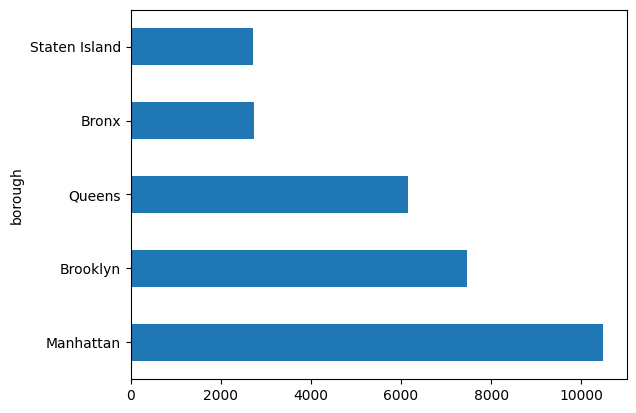

In [85]:
dogs_zips['borough'].value_counts().plot(kind='barh')

## Which borough has the highest number of dogs per-capita?

You’ll need to merge in `population_boro.csv`

In [86]:
pop = pd.read_csv('boro_population.csv')
pop.head()

,borough,population,area_sqmi
0,Manhattan,1644518,23
1,Bronx,1455444,42
2,Brooklyn,2636735,71
3,Queens,2339150,109
4,Staten Island,474558,59


In [ ]:
# turn dogs per boro count above into a dataframe so that i can merge it with borough population

dogs_per_boro = dogs_zips['borough'].value_counts().reset_index()
dogs_per_boro

,borough,count
0,Manhattan,10478
1,Brooklyn,7466
2,Queens,6154
3,Bronx,2748
4,Staten Island,2727


In [92]:
dogs_per_boro.rename(columns={'count': 'dogs_per_boro'}, inplace=True)
dogs_per_boro

,borough,dogs_per_boro
0,Manhattan,10478
1,Brooklyn,7466
2,Queens,6154
3,Bronx,2748
4,Staten Island,2727


In [93]:
dogs_per_cap = pd.merge(dogs_per_boro, pop, on='borough')
dogs_per_cap

,borough,dogs_per_boro,population,area_sqmi
0,Manhattan,10478,1644518,23
1,Brooklyn,7466,2636735,71
2,Queens,6154,2339150,109
3,Bronx,2748,1455444,42
4,Staten Island,2727,474558,59


In [96]:
dogs_per_cap['dogs_per_cap'] = dogs_per_cap['dogs_per_boro']/dogs_per_cap['population']
dogs_per_cap['people_to_dogs'] = dogs_per_cap['population']/dogs_per_cap['dogs_per_boro']
dogs_per_cap

# I think this is undercounting dogs per capita because we only brought in 30,000 of the dogs in the initial dogs dataframe

,borough,dogs_per_boro,population,area_sqmi,dogs_per_cap,people_to_dogs
0,Manhattan,10478,1644518,23,0.006371,156.949609
1,Brooklyn,7466,2636735,71,0.002832,353.165684
2,Queens,6154,2339150,109,0.002631,380.102372
3,Bronx,2748,1455444,42,0.001888,529.637555
4,Staten Island,2727,474558,59,0.005746,174.022002


## Make a bar graph of the top 5 breeds in each borough.

How do you groupby and then only take the top X number? This is very crazy, so ask in Slack, or a TA, or our buddy ChatGPT.

In [ ]:
(
    dogs_zips.groupby('borough')['Primary Breed']
    .value_counts()
    .groupby(level=0)
    .head(5)
)

borough        Primary Breed                     
Bronx          Yorkshire Terrier                     250
               Shih Tzu                              244
               Chihuahua                             208
               American Pit Bull Terrier/Pit Bull    181
               Maltese                               139
Brooklyn       Yorkshire Terrier                     501
               Shih Tzu                              481
               Chihuahua                             391
               Labrador Retriever                    255
               Maltese                               247
Manhattan      Chihuahua                             511
               Yorkshire Terrier                     505
               Shih Tzu                              454
               Labrador Retriever                    422
               Maltese                               332
Queens         Yorkshire Terrier                     434
               Shih Tzu               

<Axes: ylabel='borough,Primary Breed'>

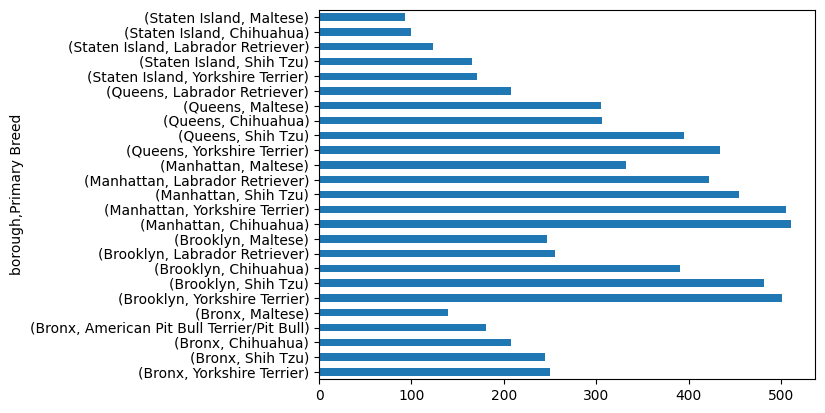

In [99]:
(
    dogs_zips.groupby('borough')['Primary Breed']
    .value_counts()
    .groupby(level=0)
    .head(5)
    .plot(kind='barh')
)

I tried to group the boroughs and breeds, first using Altair:

In [123]:
chart = alt.Chart(top_breeds).mark_bar().encode(
    x=alt.X('count:Q', title='Number of Dogs'),
    y=alt.Y('Primary Breed:N',
            sort=alt.EncodingSortField(field='rank', order='ascending')),  # Sort y by rank within each borough
    row=alt.Row('borough:N', title=None),
    color='borough:N',
    tooltip=['borough:N', 'Primary Breed:N', 'count:Q']
).properties(
    height=150,
    width=500,
    title='Top 5 Dog Breeds in Each NYC Borough'
)

chart.configure_title(fontSize=18).configure_axis(labelFontSize=12, titleFontSize=14)

alt.Chart(...)

... but Altair above was treating the y-axis as a global category, so we have to set the y-axes for each borough independently:

In [129]:
top_breeds = (
    dogs_zips.groupby(['borough','Primary Breed'])
    .size()
    .reset_index(name='count')
    .sort_values(['borough', 'count'], ascending=[True, False])
    .groupby('borough')
    .head(5)
)

top_breeds = top_breeds[top_breeds['Primary Breed'].notna()]
top_breeds['Primary Breed'] = top_breeds['Primary Breed'].str.strip()

top_breeds['rank'] = (
    top_breeds.groupby('borough')['count']
    .rank(method='first', ascending=False)
)

base = alt.Chart(top_breeds).mark_bar().encode(
    x=alt.X('count:Q', title='Number of Dogs'),
    y=alt.Y('Primary Breed:N',
            sort=alt.EncodingSortField(field='rank', order='ascending')),
    color='borough:N',
    tooltip=['borough:N', 'Primary Breed:N', 'count:Q']
)

chart = base.facet(
    row=alt.Row('borough:N', title=None),
).resolve_scale(
    y='independent'  # This is the key to avoiding 6 identical y-axes
).properties(
    title='Top 5 Dog Breeds in Each NYC Borough',
)

chart

alt.FacetChart(...)